# GOOD Market:

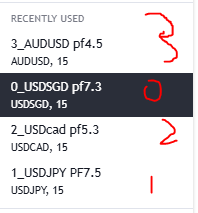

### Edit:
1. high-high, low - low so plot chart is btwn 0 - 100
2. if XAUUSD, position size = 20,000 else 100,000 (0.2 Lot vs 1Lot)

### Version Control:
# VERSION 0

In [ ]:
if time_filter
    // Define thresholds

    pmarp_buy_extreme = 10  // Buy when PMARP is below 10% (oversold)/
    pmarp_sell_extreme = 90  // Sell when PMARP is above 90% (overbought)

    // Buy/Sell Conditions
    buy_condition = (pmarp <= pmarp_buy_extreme)
    sell_condition =(pmarp >= pmarp_sell_extreme)

    // Entry and Exit Logic
    if buy_condition and strategy.position_size == 0
        strategy.entry("Buy", strategy.long,position_size)
        label.new(bar_index, low-low, "Buy", style=label.style_label_up, color=color.new(color.green, 0), textcolor=color.white)

    if sell_condition and strategy.position_size == 0
        strategy.entry("Sell", strategy.short,position_size)
        label.new(bar_index, high-high, "Sell", style=label.style_label_down, color=color.new(color.red, 0), textcolor=color.white)

    // Closing Positions
    if strategy.position_size > 0 and sell_condition
        strategy.close("Buy")
        label.new(bar_index, high-high, "Close Long", style=label.style_label_down, color=color.new(color.red, 0), textcolor=color.white)

    if strategy.position_size < 0 and buy_condition
        strategy.close("Sell")
        label.new(bar_index, low-low, "Close Short", style=label.style_label_up, color=color.new(color.green, 0), textcolor=color.white)

# VERSION 1
### This doesnt solve a rolling margin. 
- Calculates EXTREMES

In [ ]:

if time_filter
    // Define thresholds
    pmarp_buy_extreme = 10  // Buy when PMARP is below 10% (oversold)
    pmarp_sell_extreme = 90  // Sell when PMARP is above 90% (overbought)

    // Buy/Sell Conditions
    buy_condition = (pmarp <= pmarp_buy_extreme)
    sell_condition = (pmarp >= pmarp_sell_extreme)

    // Profit margin percentage (0.263%)
    margin = 0.00263

    // Entry and Exit Logic with Margin
    if buy_condition and strategy.position_size == 0
        strategy.entry("Buy", strategy.long, qty=position_size, limit=close * (1 - margin))
        label.new(bar_index, close * (1 - margin), "Buy (Limit)", style=label.style_label_up, color=color.new(color.green, 0), textcolor=color.white)

    if sell_condition and strategy.position_size == 0
        strategy.entry("Sell", strategy.short, qty=position_size, limit=close * (1 + margin))
        label.new(bar_index, close * (1 + margin), "Sell (Limit)", style=label.style_label_down, color=color.new(color.red, 0), textcolor=color.white)

    // Closing Positions with Margin
    if strategy.position_size > 0 and sell_condition
        strategy.close("Buy")
        label.new(bar_index, close * (1 + margin), "Close Long", style=label.style_label_down, color=color.new(color.red, 0), textcolor=color.white)

    if strategy.position_size < 0 and buy_condition
        strategy.close("Sell")
        label.new(bar_index, close * (1 - margin), "Close Short", style=label.style_label_up, color=color.new(color.green, 0), textcolor=color.white)


### VERSION 2: NOT solving Rolling Error, but allows purchase close*1.000263
 - USDSGD 100% Profitable, PF NA

In [ ]:
if time_filter
    // Define thresholds
    pmarp_buy_extreme = 10  // Buy when PMARP is below 10% (oversold)
    pmarp_sell_extreme = 90  // Sell when PMARP is above 90% (overbought)

    // Buy/Sell Conditions
    buy_condition = (pmarp <= pmarp_buy_extreme)
    sell_condition = (pmarp >= pmarp_sell_extreme)
    
    // Initialize a theoretical entry price
    var float orig_entry = na
    
    // Entry and Exit Logic
    if buy_condition and strategy.position_size == 0
        if na(orig_entry)  // Set orig_entry only once
            orig_entry := close * (1 - 0.00263)  // Set the adjusted margin price
        
        if orig_entry >= 0
            strategy.entry("Buy", strategy.long, qty=position_size, limit=orig_entry)
            label.new(bar_index, orig_entry, "Buy", style=label.style_label_up, color=color.new(color.green, 0), textcolor=color.white)

    if sell_condition and strategy.position_size == 0
        if na(orig_entry)  // Set orig_entry only once
            orig_entry := close * (1 + 0.00263)  // Set the adjusted margin price
        
        if orig_entry >= 0
            strategy.entry("Sell", strategy.short, qty=position_size, limit=orig_entry)
            label.new(bar_index, orig_entry, "Sell", style=label.style_label_down, color=color.new(color.red, 0), textcolor=color.white)
    
    // Closing Positions
    if strategy.position_size > 0 and sell_condition
        strategy.close("Buy")
        label.new(bar_index, high, "Close Long", style=label.style_label_down, color=color.new(color.red, 0), textcolor=color.white)
        orig_entry := na  // Reset orig_entry after closing the position

    if strategy.position_size < 0 and buy_condition
        strategy.close("Sell")
        label.new(bar_index, low, "Close Short", style=label.style_label_up, color=color.new(color.green, 0), textcolor=color.white)
        orig_entry := na  // Reset orig_entry after closing the position


### VERSION 3: Solves Rolling Error

### 3.1 Use Low when enter, currenmt best

In [ ]:

if time_filter
    // Define thresholds
    pmarp_buy_extreme = 10  // Buy when PMARP is below 10% (oversold)
    pmarp_sell_extreme = 90  // Sell when PMARP is above 90% (overbought)

    // Buy/Sell Conditions
    buy_condition = (pmarp <= pmarp_buy_extreme)
    sell_condition = (pmarp >= pmarp_sell_extreme)
    
    // Entry Logic
    if buy_condition and strategy.position_size == 0
        if na(orig_entry)  // Set orig_entry only once
            orig_entry := low * (1 - 0.00263)  // Set the adjusted margin price
        
        if orig_entry >= 0
            strategy.entry("Buy", strategy.long, qty=position_size, limit=orig_entry)
            label.new(bar_index, orig_entry, "Buy", style=label.style_label_up, color=color.new(color.green, 0), textcolor=color.white)

    if sell_condition and strategy.position_size == 0
        if na(orig_entry)  // Set orig_entry only once
            orig_entry := high * (1 + 0.00263)  // Set the adjusted margin price
        
        if orig_entry >= 0
            strategy.entry("Sell", strategy.short, qty=position_size, limit=orig_entry)
            label.new(bar_index, orig_entry, "Sell", style=label.style_label_down, color=color.new(color.red, 0), textcolor=color.white)
    
    // Closing Positions and Resetting orig_entry
    if strategy.position_size > 0 and sell_condition
        strategy.close("Buy")
        label.new(bar_index, high, "Close Long", style=label.style_label_down, color=color.new(color.red, 0), textcolor=color.white)
        orig_entry := na  // Reset orig_entry after closing the position

    if strategy.position_size < 0 and buy_condition
        strategy.close("Sell")
        label.new(bar_index, low, "Close Short", style=label.style_label_up, color=color.new(color.green, 0), textcolor=color.white)
        orig_entry := na  // Reset orig_entry after closing the position


### Version 4 , implement stop loss

In [ ]:

if time_filter
    // Define thresholds
    pmarp_buy_extreme = 10  // Buy when PMARP is below 10% (oversold)
    pmarp_sell_extreme = 90  // Sell when PMARP is above 90% (overbought)

    // Profit margin percentage (0.263%)
    margin = 0.00263 //DELTA

    // Stop loss percentage (0.263% * 2 = 0.526%)
    stop_loss_margin = margin * 1 //DELTA: 1 or 2

    // Buy/Sell Conditions
    buy_condition = (pmarp <= pmarp_buy_extreme)
    sell_condition = (pmarp >= pmarp_sell_extreme)

    // Entry and Exit Logic with Margin and Stop Loss
    if buy_condition and strategy.position_size == 0
        // Adjusted buy price and stop loss
        buy_price = low * (1 - margin)
        stop_loss_price = buy_price * (1 - stop_loss_margin)
        
        // Place buy order with stop loss
        strategy.entry("Buy", strategy.long, qty=position_size, limit=buy_price)
        strategy.exit("Stop Loss (Long)", from_entry="Buy", stop=stop_loss_price)
        // label.new(bar_index, 0, "Buy (Limit)", style=label.style_label_up, color=color.new(color.green, 0), textcolor=color.white)
        label.new(bar_index, 0, "BuyLow: " + str.tostring(low) + ", Limit: " + str.tostring(buy_price), style=label.style_label_up, color=color.new(color.green, 0), textcolor=color.white)

    if sell_condition and strategy.position_size == 0
        // Adjusted sell price and stop loss
        sell_price = high * (1 + margin)
        stop_loss_price = sell_price * (1 + stop_loss_margin)
        
        // Place sell order with stop loss
        strategy.entry("Sell", strategy.short, qty=position_size, limit=sell_price)
        strategy.exit("Stop Loss (Short)", from_entry="Sell", stop=stop_loss_price)
        label.new(bar_index, 0, "Sell (Limit)", style=label.style_label_down, color=color.new(color.red, 0), textcolor=color.white)

    // Quickest Possible Exit Without Stop Loss Adjustment
    if strategy.position_size > 0 and sell_condition
        strategy.close("Buy")
        label.new(bar_index, 0, "Close Long", style=label.style_label_down, color=color.new(color.red, 0), textcolor=color.white)

    if strategy.position_size < 0 and buy_condition
        strategy.close("Sell")
        label.new(bar_index, 0, "Close Short", style=label.style_label_up, color=color.new(color.green, 0), textcolor=color.white)
